In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance
Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion
For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

### Reading the data

In [28]:
data = pd.read_csv(r'D:\Devi\ICT_TVM\ASSIGNMENTS\train_LZdllcl.csv')

In [27]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Explorartory data analysis

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [29]:
data.shape

(54808, 14)

In [30]:
data.columns


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [31]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [32]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

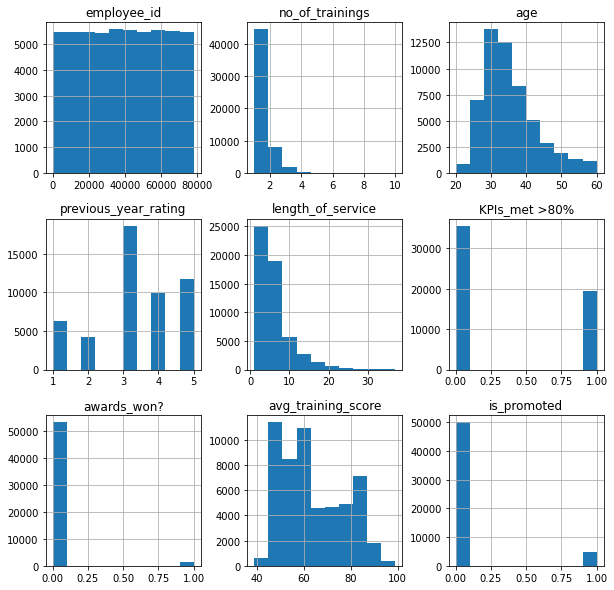

In [33]:
data.hist(figsize=(10,10))
plt.show()

From the graphs, we can figure out some insights like most of the employees undergone single training and the average age of employees lies between 30 and 40. The employees have an average service of 5 years. 

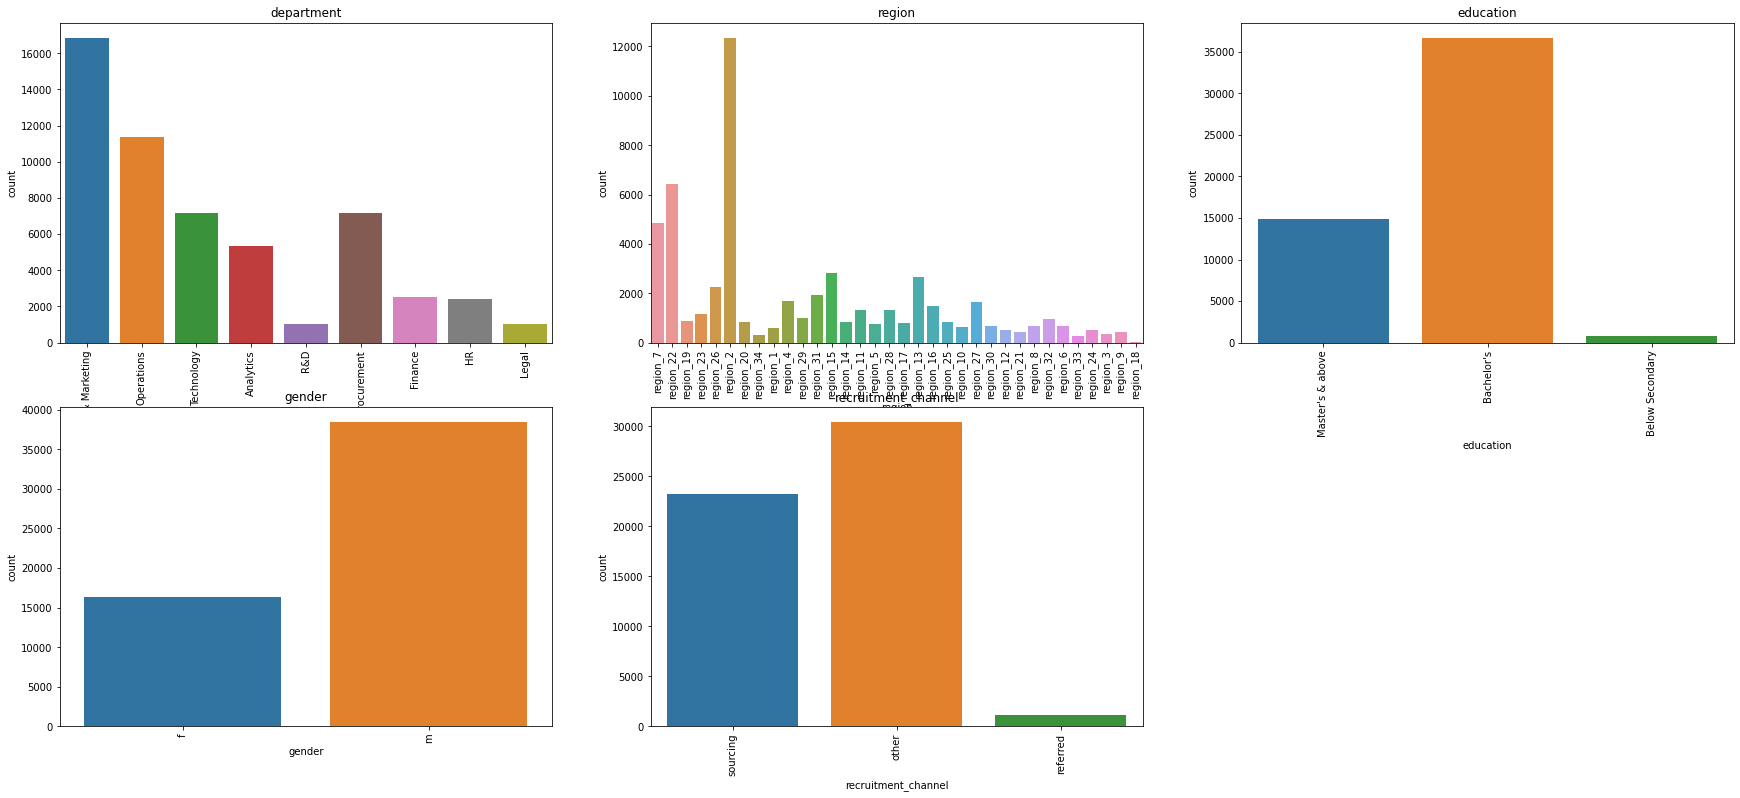

In [53]:
col = ['department', 'region', 'education', 'gender',
       'recruitment_channel']
plt.figure(figsize=(30,20))
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    sns.countplot(data=data,x=data[col[i]])
    plt.title(col[i])
    plt.xticks(rotation=90)
plt.show()    

Most of the employees working under Sales&Marketing department followed by operations.Most of the employees holding Bachelor's degree where as less than 50% of employees having masters and above education classification.Male employees are more than female employees.

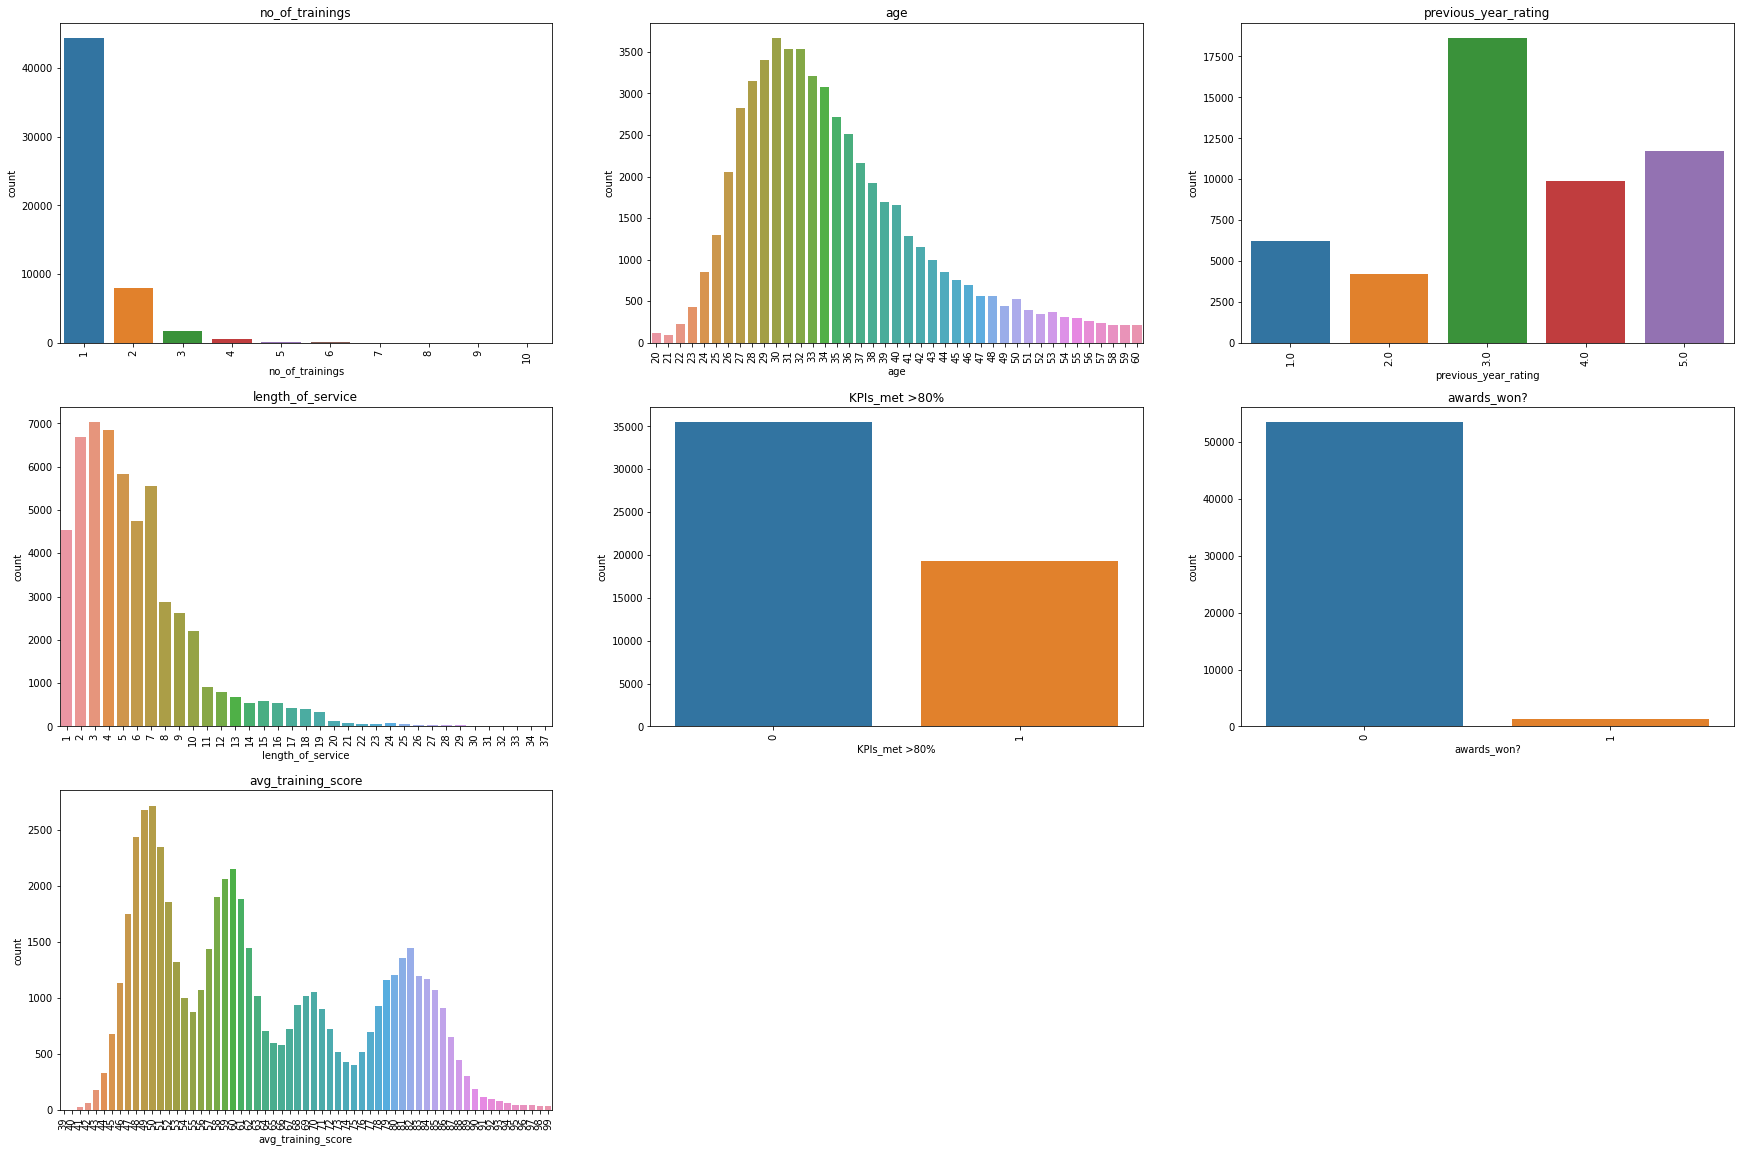

In [52]:
col = ['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']
plt.figure(figsize=(30,20))
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    sns.countplot(data=data,x=data[col[i]])
    plt.title(col[i])
    plt.xticks(rotation=90)
plt.show() 

From this we can findout some intersting insights like:
<br>
    * Most of the employees are at the age of 30 with single training.
    <br>
    * Most ofthe employees having 3 years of service 
    <br>
    * Most of the employees donot have a Key performance indicator value>80% and doesnot won any awards

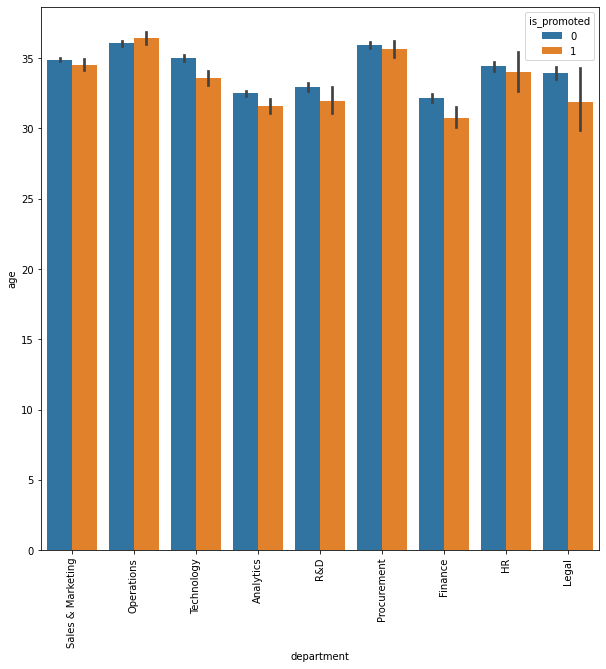

In [60]:
# Bivariate 
plt.figure(figsize=(10,10))
sns.barplot(data=data, x='department', y='age',hue='is_promoted')
plt.xticks(rotation=90)
plt.show()

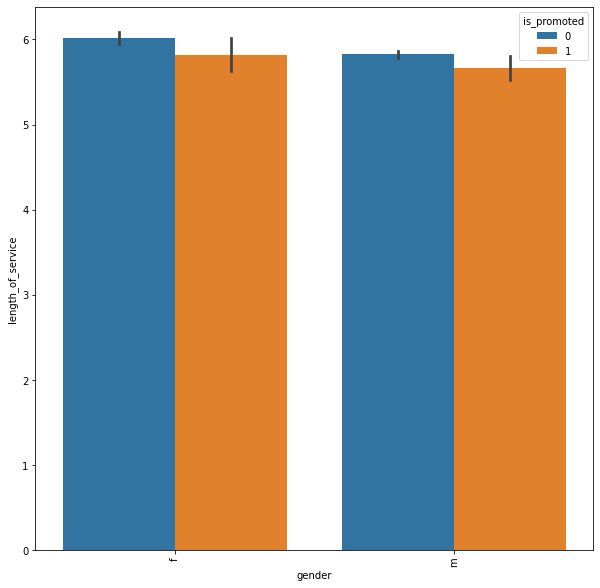

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, x='gender', y='length_of_service',hue='is_promoted')
plt.xticks(rotation=90)
plt.show()

Male and female employees having more than 5 years of experience are promoted

In [68]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

<AxesSubplot:>

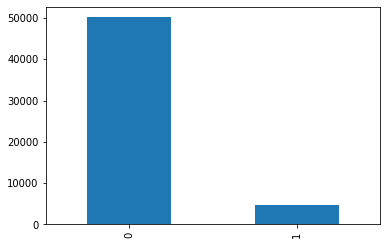

In [67]:
data['is_promoted'].value_counts().plot(kind='bar')

There are 4668 employees got promoted

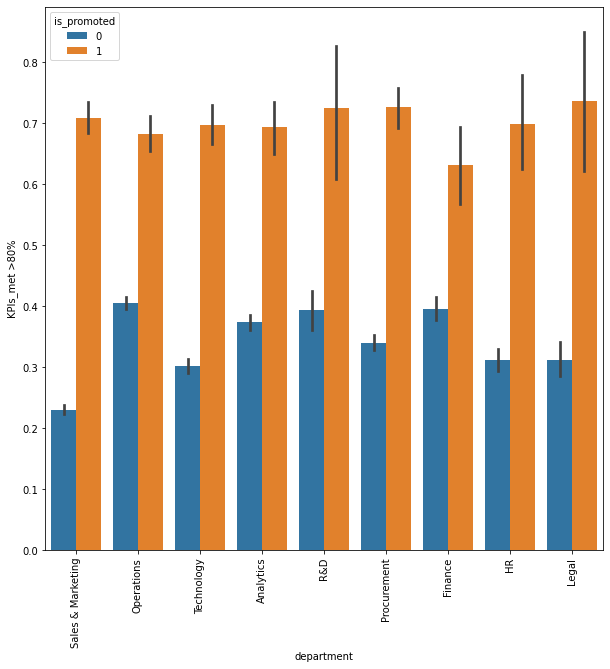

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, x='department', y='KPIs_met >80%',hue='is_promoted')
plt.xticks(rotation=90)
plt.show()

Employees having KPI score>70% are promoted from all departments 

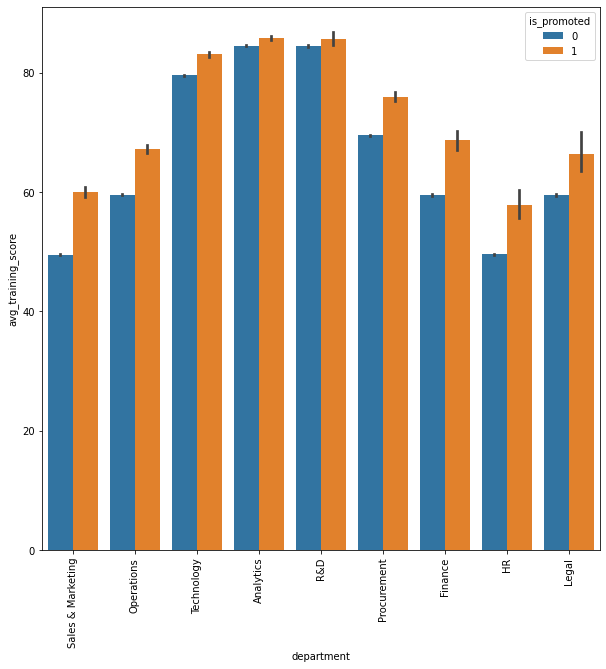

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, x='department', y='avg_training_score',hue='is_promoted')
plt.xticks(rotation=90)
plt.show()

From department Analytics,Technology,R&D, Average training score is greater than 80

### Preprocessing

In [69]:
# checking for missing values

data.isna().sum()

employee_id                0
department                 0
region                     0
education               2401
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

there is missing values in education and previous year ratings

<AxesSubplot:xlabel='education', ylabel='count'>

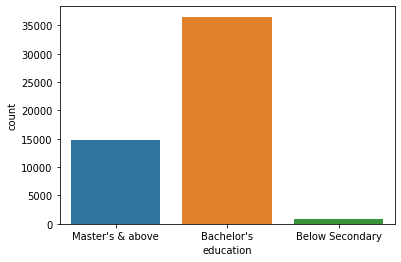

In [70]:
sns.countplot(data=data, x='education')

since most of them having bachelors education, we can fill it with bachelors education

In [71]:
data['education'] = data['education'].fillna("Bachelor's education")

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

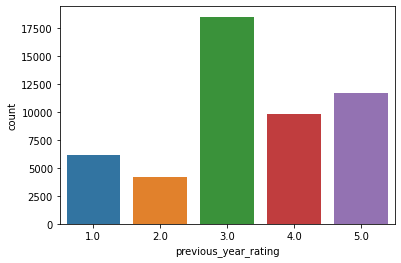

In [72]:
sns.countplot(data=data, x='previous_year_rating')

previous year rating feature is discrete with median of 3. 

In [73]:
data['previous_year_rating'] = data['previous_year_rating'].fillna(3)

In [74]:
data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

<AxesSubplot:>

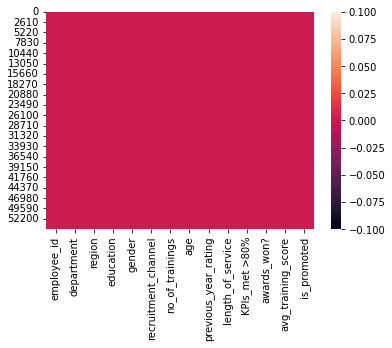

In [11]:
sns.heatmap(data.isna())

All the missing values are successfully filled

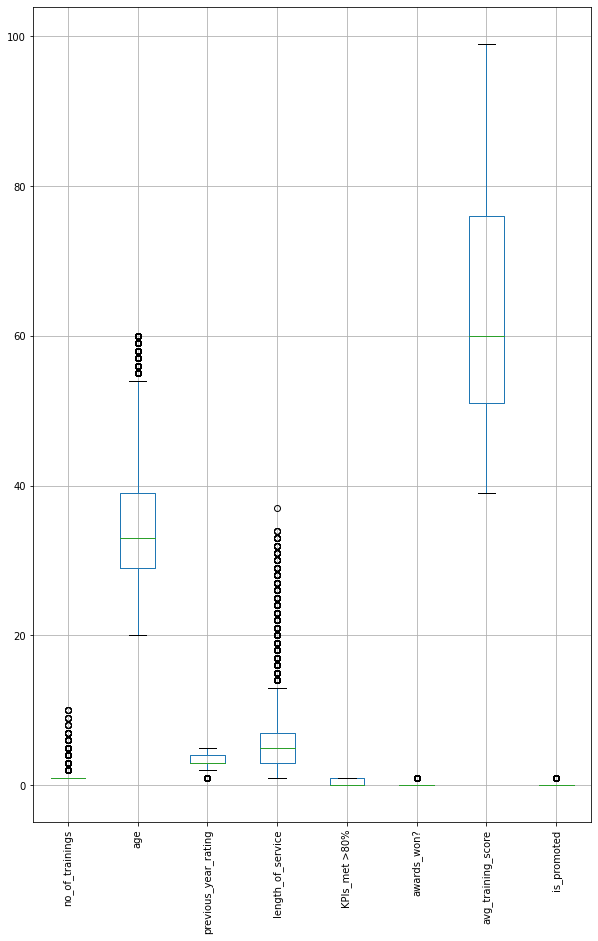

In [30]:
# Checking and handling outliers

data1 = data.drop(['employee_id'],axis=1)
freqgraph = data1.select_dtypes(include=['float64','int64'])
freqgraph.boxplot(figsize=(10,15))
plt.xticks(rotation=90)
plt.show()

we have to manage the outliers in length of service, others like no of training,age,previous year traing doesnot having an extreme outliers

In [42]:
Q1=np.percentile(data['length_of_service'],30,interpolation='midpoint')
Q2=np.percentile(data['length_of_service'],60,interpolation='midpoint')
Q3=np.percentile(data['length_of_service'],90,interpolation='midpoint')


print(Q1)
print(Q2)
print(Q3)

3.0
6.0
11.0


In [43]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

-9.0
23.0


In [45]:
outlier=[]
for x in data['length_of_service']:
    if((x> up_limit) or (x<low_limit)):
        outlier.append(x)
outlier

[26,
 25,
 28,
 25,
 24,
 24,
 31,
 29,
 31,
 28,
 24,
 30,
 28,
 28,
 31,
 34,
 25,
 30,
 29,
 24,
 27,
 25,
 24,
 30,
 27,
 26,
 26,
 25,
 27,
 26,
 25,
 24,
 27,
 27,
 31,
 25,
 25,
 28,
 28,
 24,
 24,
 24,
 29,
 25,
 24,
 25,
 33,
 32,
 24,
 29,
 27,
 31,
 28,
 26,
 25,
 25,
 24,
 27,
 31,
 26,
 29,
 26,
 34,
 26,
 33,
 27,
 26,
 30,
 31,
 31,
 24,
 28,
 25,
 25,
 26,
 25,
 25,
 33,
 24,
 26,
 25,
 34,
 30,
 27,
 25,
 25,
 25,
 29,
 34,
 28,
 33,
 29,
 26,
 28,
 31,
 26,
 27,
 25,
 25,
 27,
 26,
 25,
 26,
 25,
 30,
 29,
 27,
 32,
 26,
 27,
 29,
 26,
 28,
 27,
 27,
 32,
 29,
 33,
 31,
 26,
 24,
 32,
 27,
 25,
 24,
 24,
 28,
 26,
 25,
 26,
 30,
 24,
 26,
 24,
 24,
 26,
 27,
 24,
 31,
 24,
 24,
 26,
 33,
 26,
 24,
 26,
 28,
 28,
 25,
 30,
 24,
 24,
 27,
 29,
 24,
 25,
 24,
 24,
 25,
 29,
 24,
 28,
 27,
 27,
 29,
 27,
 25,
 29,
 27,
 32,
 26,
 37,
 26,
 28,
 31,
 28,
 26,
 24,
 25,
 29,
 27,
 27,
 28,
 25,
 29,
 26,
 25,
 25,
 30,
 28,
 27,
 24,
 29,
 26,
 27,
 27,
 25,
 24,
 27,
 28,


In [50]:
ind=data['length_of_service']>up_limit
data.loc[ind].index

Int64Index([   42,   426,   435,   515,   590,   712,  1091,  1109,  1204,
             1249,
            ...
            53224, 53313, 53747, 53896, 54037, 54265, 54544, 54578, 54580,
            54617],
           dtype='int64', length=314)

In [53]:
ind1 = data.loc[ind].index

Int64Index([   42,   426,   435,   515,   590,   712,  1091,  1109,  1204,
             1249,
            ...
            53224, 53313, 53747, 53896, 54037, 54265, 54544, 54578, 54580,
            54617],
           dtype='int64', length=314)

In [56]:
data.drop(ind1,axis=0,inplace=True)

In [58]:
data.shape

(54494, 14)

In [107]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
print("Unbalanced data : ",Counter(Y))
X_sm,Y_sm = sm.fit_resample(X,Y)
print("Balanced data : ",Counter(Y_sm))

Unbalanced data :  Counter({0: 49837, 1: 4657})
Balanced data :  Counter({0: 49837, 1: 49837})


### Splitting the dataset

In [110]:
X = data.drop(['is_promoted'],axis=1)

In [111]:
X.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [82]:
Y = data['is_promoted']

In [83]:
Y


0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54494, dtype: int64

### Encoding 

In [84]:

from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['department', 'region', 'education', 'gender',
       'recruitment_channel',]
for i in np.arange(len(a)):
    X[a[i]]=label_en.fit_transform(X[a[i]])

In [85]:
X.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,7,31,3,0,2,1,35,5.0,8,1,0,49
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73


In [86]:
# Standardisation


from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X = std.fit_transform(X)

In [78]:
X

array([[ 1.16179533,  0.80978029,  1.77249704, ...,  1.35461461,
        -0.15447141, -1.07559974],
       [ 1.14864791, -0.38661295, -0.16464259, ..., -0.73821734,
        -0.15447141, -0.2533726 ],
       [-1.40239469,  0.80978029, -0.62044015, ..., -0.73821734,
        -0.15447141, -1.00085182],
       ...,
       [-1.1188619 , -1.98180394, -1.75993404, ...,  1.35461461,
        -0.15447141,  1.16683791],
       [-1.13231919,  0.80978029,  2.00039582, ..., -0.73821734,
        -0.15447141, -1.37459143],
       [ 0.54594705, -1.18420845, -0.16464259, ..., -0.73821734,
        -0.15447141, -1.07559974]])

In [112]:

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_sm,Y_sm,test_size=.2,random_state=45)

In [113]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train,Y_train)

GaussianNB()

In [114]:
gaussian_nb.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [115]:
gaussian_nb.score(X_test,Y_test)

0.6838725859041886

### Regression Model

#### Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train,Y_train)

LogisticRegression()

In [117]:
y_pred = logit.predict(X_test)

In [118]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [119]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.7228492600953098
precision score: 0.7227966750907944
recall_score: 0.7228347491222109
f1 score: 0.7228070496518166


In [120]:
confusion_matrix(Y_test,y_pred)

array([[7328, 2797],
       [2728, 7082]], dtype=int64)

### KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,Y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

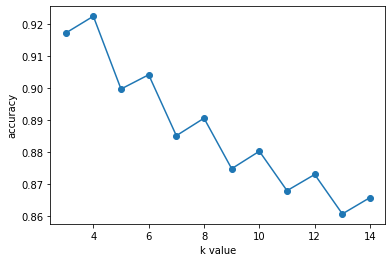

In [122]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [123]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)

In [124]:
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [125]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.9225482819162277
precision score: 0.9294863485805555
recall_score: 0.9235881753312946
f1 score: 0.9223445820397256


In [126]:
confusion_matrix(Y_test,y_pred)

array([[8685, 1440],
       [ 104, 9706]], dtype=int64)

#### SVM

In [127]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,Y_train)
y_pred=svm_linear.predict(X_test)

In [128]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [129]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.7127664910960622
precision score: 0.713958924067093
recall_score: 0.7132814588288594
f1 score: 0.7126358806475748


### Decision Tree 

In [130]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
y_pred=dt_model.predict(X_test)

In [131]:
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [132]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.9350388763481314
precision score: 0.9350209461759945
recall_score: 0.935126514894099
f1 score: 0.9350333416531116


### Random forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(n_estimators=100)
random.fit(X_train,Y_train)

RandomForestClassifier()

In [134]:
y_pred=random.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [135]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.9716077251065964
precision score: 0.9718173089173928
recall_score: 0.9714801223241589
f1 score: 0.9715921353307256


### Testing Data

In [163]:
test_data = pd.read_csv(r'D:\Devi\ICT_TVM\ASSIGNMENTS\test_2umaH9m.csv')

In [137]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [148]:
test_data.shape

(23490, 13)

### Preprocessing

In [138]:
test_data.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

There is missing values in education and previous year rating

<AxesSubplot:xlabel='education', ylabel='count'>

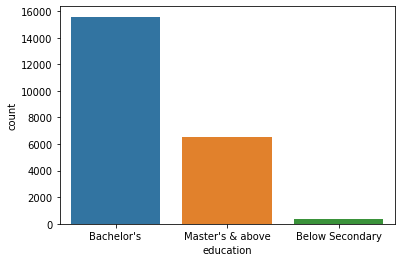

In [140]:
sns.countplot(data=test_data,x='education')

We can fill the education column with bachelors

In [142]:
test_data['education'] = test_data['education'].fillna("Bachelor's")

<AxesSubplot:xlabel='previous_year_rating', ylabel='count'>

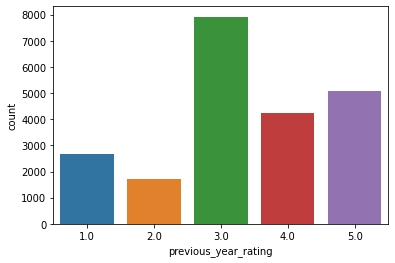

In [143]:
sns.countplot(data=test_data,x='previous_year_rating')

In [144]:
test_data['previous_year_rating'] = test_data['previous_year_rating'].fillna(3)

<AxesSubplot:>

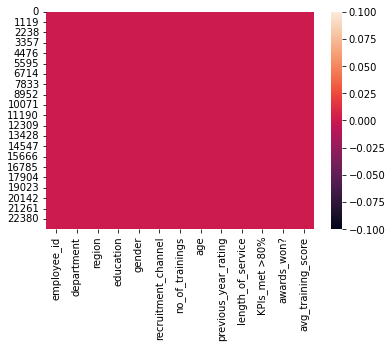

In [146]:
sns.heatmap(test_data.isna())

All null values are successfully managed

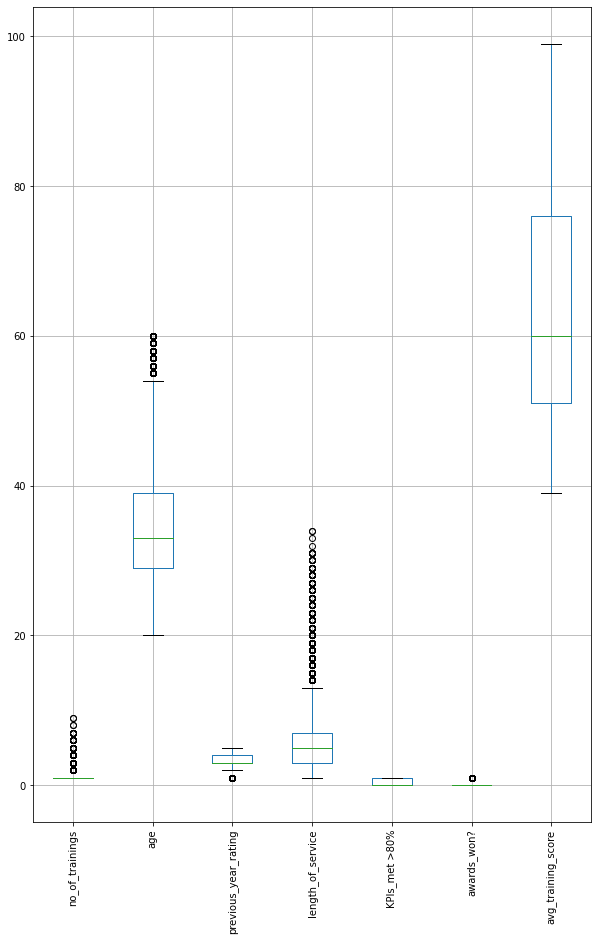

In [147]:
# checking and handling outliers

data1 = test_data.drop(['employee_id'],axis=1)
freqgraph = data1.select_dtypes(include=['float64','int64'])
freqgraph.boxplot(figsize=(10,15))
plt.xticks(rotation=90)
plt.show()

There is no such extreme outliers, so we can proceed with the same

### Encoding

In [150]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['department', 'region', 'education', 'gender',
       'recruitment_channel',]
for i in np.arange(len(a)):
    test_data[a[i]]=label_en.fit_transform(test_data[a[i]])

In [151]:
### Standardisation


from sklearn.preprocessing import StandardScaler

std = StandardScaler()
test_data = std.fit_transform(test_data)

In [152]:
prediction = random.predict(test_data)

In [153]:
prediction

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [159]:
Prediction = pd.DataFrame(prediction)

In [160]:
Prediction

,0
0,1
1,0
2,0
3,0
4,1
...,...
23485,1
23486,1
23487,0
23488,0


In [164]:
test_data["Predictions"] = Prediction

In [165]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Predictions
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,1
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,1


In [171]:
Solution = test_data[['employee_id','Predictions']]

In [172]:
Solution

,employee_id,Predictions
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,1
...,...,...
23485,53478,1
23486,25600,1
23487,45409,0
23488,1186,0


In [173]:
Solution.to_csv('Submission.csv', index=False)